[1] Используя make_blobs с любым random_state, сгенерировать датасет df1, в котором есть три класса с размером каждого класса 1000 и четыре количественных (недискретных) признака.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

# Генерация датасета df1 с 3 классами по 1000 объектов и 4 количественными признаками
random_state = 12
X, y = make_blobs(n_samples=3000, centers=3, n_features=4, random_state=random_state)

# Создаем DataFrame
df1 = pd.DataFrame(X, columns=[f'feature_{i + 1}' for i in range(X.shape[1])])
df1['class'] = y

[2] Не забываем повторять шаги с задания 1
- ключевые характеристики датасета
- корреляции
- визуализация на всех парах переменных

In [17]:
# Ключевые характеристики
key_stats = df1.describe()
print(key_stats)

         feature_1    feature_2    feature_3    feature_4        class
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000
mean     -2.538677     1.967795    -0.322164    -2.178905     1.000000
std       8.366860     6.739500     5.993477     5.189091     0.816633
min     -13.276081    -9.851627    -7.881116   -12.742092     0.000000
25%      -9.134792    -6.534201    -4.833433    -8.613832     0.000000
50%      -6.955448     4.765162    -3.803195     0.501432     1.000000
75%       8.405490     7.693191     7.357046     1.836441     2.000000
max      12.078280    11.883808    11.299771     5.654318     2.000000


In [18]:
# Корреляционная матрица
correlation_matrix = df1.corr()
print(correlation_matrix)

           feature_1  feature_2  feature_3  feature_4     class
feature_1   1.000000  -0.978719  -0.578634   0.686001  0.783244
feature_2  -0.978719   1.000000   0.640331  -0.738116 -0.726929
feature_3  -0.578634   0.640331   1.000000  -0.957923  0.029113
feature_4   0.686001  -0.738116  -0.957923   1.000000  0.116470
class       0.783244  -0.726929   0.029113   0.116470  1.000000


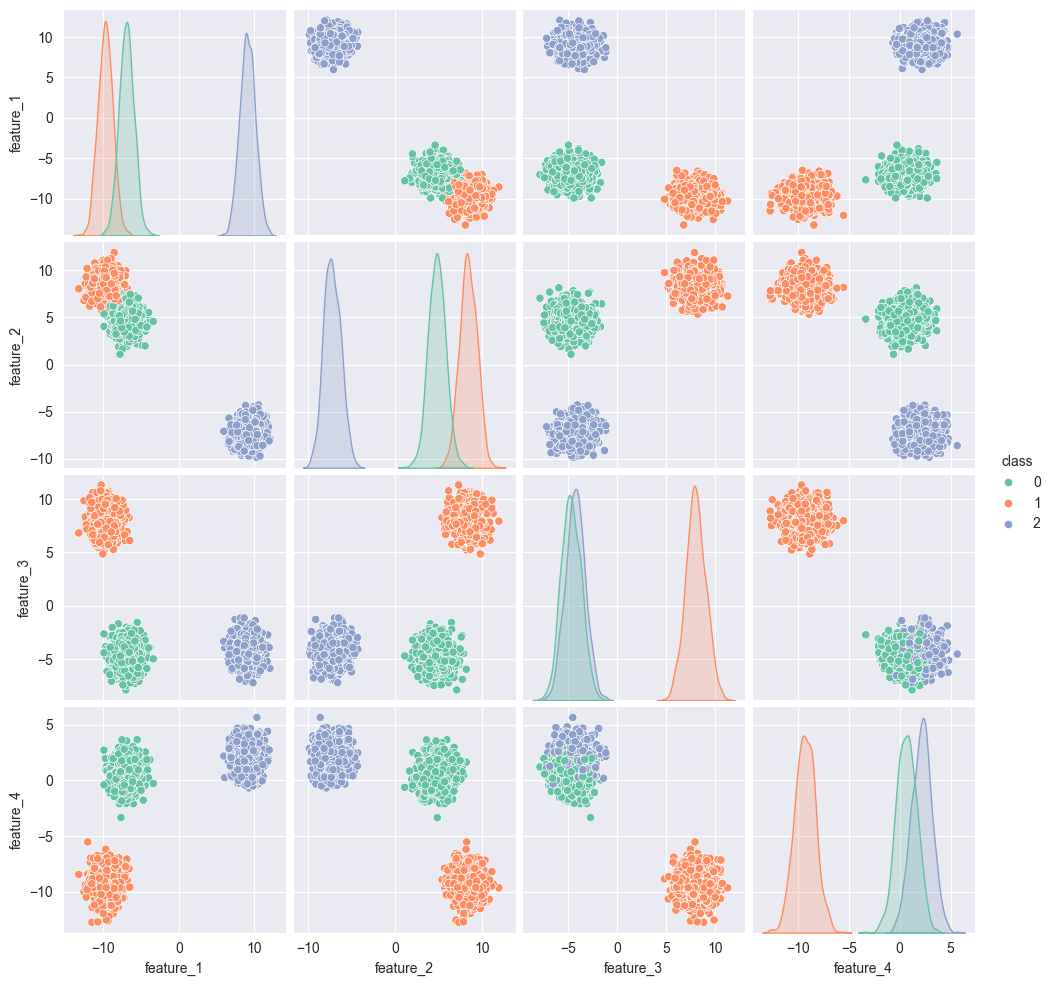

In [19]:
# Визуализация на всех парах переменных
sns.pairplot(df1, hue='class', palette='Set2')
plt.show()

[3] На основе созданного в пункте [1] датасета сгенерировать отдельные дополнительные датасеты (df2, df5, df10…), в которых объекты одного класса повторены 2 раза, 5 раз, 10 раз, 20 раз, 50 раз, 100 раз, 1000 раз, 10k раз, а количество объектов в остальных классов неизменно.


In [20]:
def generate_datasets(df, repetitions_list):
    datasets = {}
    for reps in repetitions_list:
        # Копируем исходные данные
        df_copy = df.copy()

        # Увеличиваем класс 0
        class_0 = df_copy[df_copy['class'] == 0]
        class_0_repeated = class_0.sample(reps, replace=True)

        # Объединяем с остальными классами
        df_repeated = pd.concat([class_0_repeated, df_copy[df_copy['class'] != 0]], ignore_index=True)

        # Перемешиваем данные
        df_repeated = df_repeated.sample(frac=1, random_state=random_state).reset_index(drop=True)

        datasets[f'df{reps}'] = df_repeated
    return datasets


# Список количества повторений
repetitions = [2, 5, 10, 20, 50, 100, 1000, 10000]
additional_datasets = generate_datasets(df1, repetitions)

# Пример отображения одного из дополнительных датасетов
print(additional_datasets['df10'])

      feature_1  feature_2  feature_3  feature_4  class
0     -9.989026   8.526491   9.082532  -9.208745      1
1    -10.768410   8.601820   5.804401  -8.602270      1
2      9.087374  -6.381211  -2.194573   0.381397      2
3      9.183671  -6.958176  -4.515609   1.275519      2
4      9.428639  -8.218624  -5.457952   3.280011      2
...         ...        ...        ...        ...    ...
2005  -8.861550   8.645328   7.876929 -10.421068      1
2006   6.761051  -8.434939  -2.867884   3.372788      2
2007   8.741117  -8.428990  -4.897076   0.963782      2
2008   9.346073  -8.631035  -5.044154   4.237606      2
2009  10.024594  -7.125471  -5.339599   0.470607      2

[2010 rows x 5 columns]


Ключевые характеристики датасета:
         feature_1    feature_2    feature_3    feature_4        class
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000
mean     -2.438740     2.079648    -4.626291     6.238737     1.000000
std       3.758897     6.764158     6.627150     3.275081     0.816633
min     -10.100644   -10.481195   -13.510710    -1.017966     0.000000
25%      -6.131012    -6.272828    -9.604578     2.665286     0.000000
50%      -2.455206     4.128959    -8.561488     7.300362     1.000000
75%       1.364304     8.337166     3.957308     8.924860     2.000000
max       5.399683    12.867018     7.791936    12.096526     2.000000

Корреляционная матрица:
           feature_1  feature_2  feature_3  feature_4     class
feature_1   1.000000   0.639426  -0.052642   0.257931  0.488773
feature_2   0.639426   1.000000   0.687744  -0.492235 -0.295303
feature_3  -0.052642   0.687744   1.000000  -0.915680 -0.878153
feature_4   0.257931  -0.492235  -0.915680   1

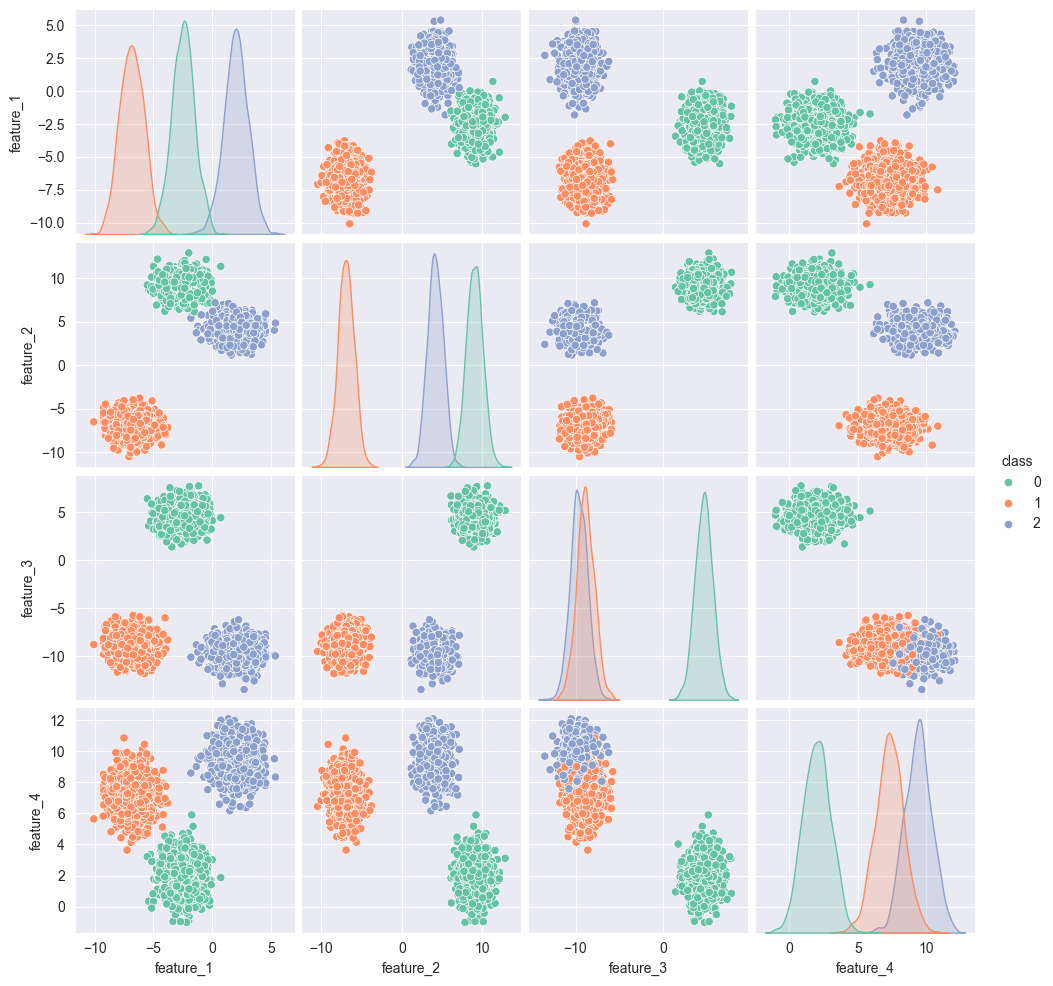


Пример датасета df10:
      feature_1  feature_2  feature_3  feature_4  class
0     -5.921633  -6.216564  -9.864409   7.704949      1
1     -4.794914  -7.888021  -9.178087   7.555130      1
2     -7.780218  -8.012895  -8.487958   6.479199      1
3     -7.789317  -6.120610  -9.455103   5.975527      1
4      2.118310   4.363526  -9.592512  11.103559      2
...         ...        ...        ...        ...    ...
2005   2.659208   3.686326 -10.121304  10.038100      2
2006  -9.003620  -6.466493  -6.702741   7.605557      1
2007  -6.772419  -7.198956  -8.211893   7.243614      1
2008  -7.735976  -7.491743  -7.719695   7.336566      1
2009  -4.491255  -5.695853  -8.115501   7.435322      1

[2010 rows x 5 columns]

Пример датасета df10000:
       feature_1  feature_2  feature_3  feature_4  class
0      -2.743217   9.480645   5.627213   1.897219      0
1      -2.768240   8.817936   4.568278   1.935947      0
2      -1.550812   9.065947   4.868954   3.047488      0
3      -0.759614  10.39574

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

# 1. Генерация датасета df1
random_state = 42
X, y = make_blobs(n_samples=3000, centers=3, n_features=4, random_state=random_state)
df1 = pd.DataFrame(X, columns=[f'feature_{i + 1}' for i in range(X.shape[1])])
df1['class'] = y

# 2. Анализ датасета
# Ключевые характеристики
key_stats = df1.describe()
print("Ключевые характеристики датасета:")
print(key_stats)

# Корреляции
correlation_matrix = df1.corr()
print("\nКорреляционная матрица:")
print(correlation_matrix)

# Визуализация на всех парах переменных
sns.pairplot(df1, hue='class', palette='Set2')
plt.show()


# 3. Генерация дополнительных датасетов
def generate_datasets(df, repetitions_list):
    datasets = {}
    for reps in repetitions_list:
        df_copy = df.copy()
        class_0 = df_copy[df_copy['class'] == 0]
        class_0_repeated = class_0.sample(reps, replace=True)
        df_repeated = pd.concat([class_0_repeated, df_copy[df_copy['class'] != 0]], ignore_index=True)
        df_repeated = df_repeated.sample(frac=1, random_state=random_state).reset_index(drop=True)
        datasets[f'df{reps}'] = df_repeated
    return datasets


# Список количества повторений
repetitions = [1, 2, 5, 10, 20, 50, 100, 1000, 10000]
additional_datasets = generate_datasets(df1, repetitions)

# Пример отображения одного из дополнительных датасетов
print("\nПример датасета df10:")
print(additional_datasets['df10'])
print("\nПример датасета df10000:")
print(additional_datasets['df10000'])

задание 4-6

[4] Выбрать пару классов (включая класс с повторенными объектами) и пару количественных признаков.  
Используя метод LDA (линейный дискриминантный анализ), для каждого из датасетов df1, df2, df5, df10, df20, df50, df100, df1000, df10k, построить решающую функцию алгоритма, разграниченные решающей функцией зоны и отдельные
объекты классов.

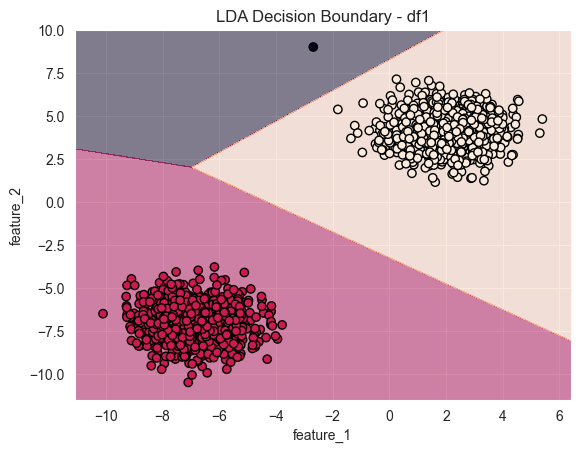

Датасет: df1, Центр класса 0: [-2.68226945  9.02986518], Центр класса 1: [-6.85365418 -6.94917586], Общий центр: [-4.76796181  1.04034466], Точка пересечения: [-0.42347151 17.68248948]


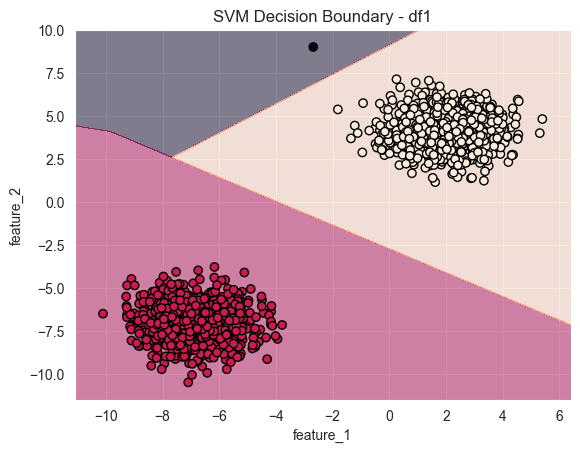

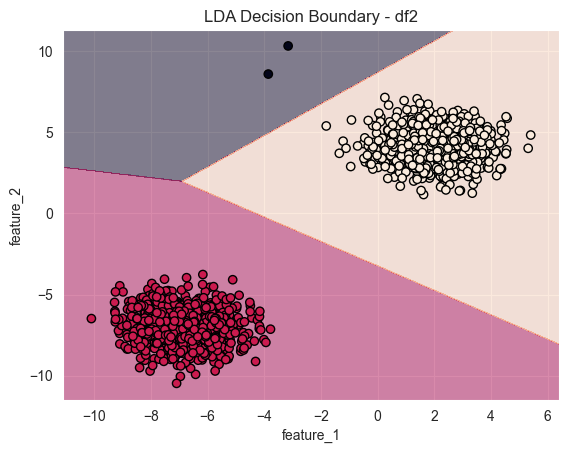

Датасет: df2, Центр класса 0: [-3.50867225  9.46733126], Центр класса 1: [-6.85365418 -6.94917586], Общий центр: [-5.18116321  1.2590777 ], Точка пересечения: [-4.52969693  4.45634485]


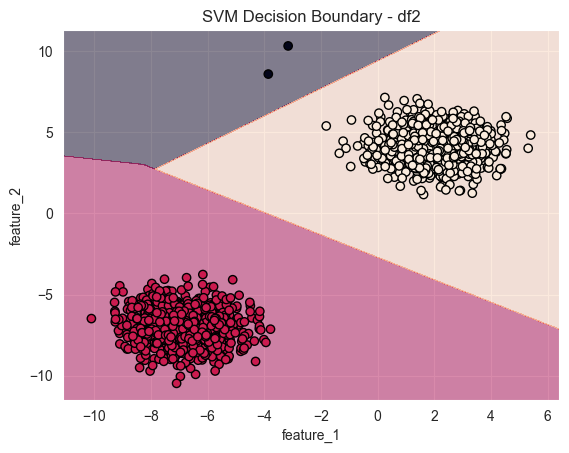

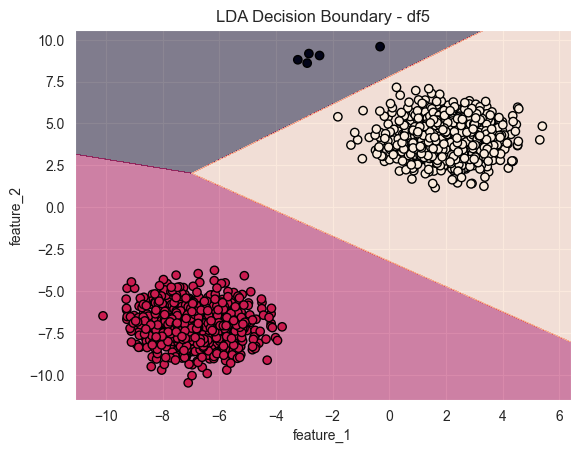

Датасет: df5, Центр класса 0: [-2.34941403  9.04213148], Центр класса 1: [-6.85365418 -6.94917586], Общий центр: [-4.60153411  1.04647781], Точка пересечения: [ 1.57430808 22.97243809]


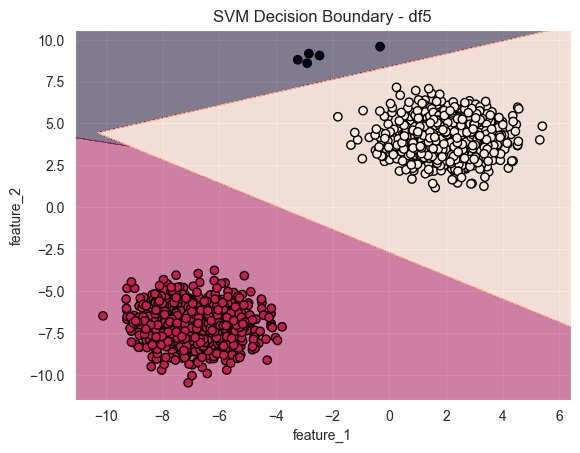

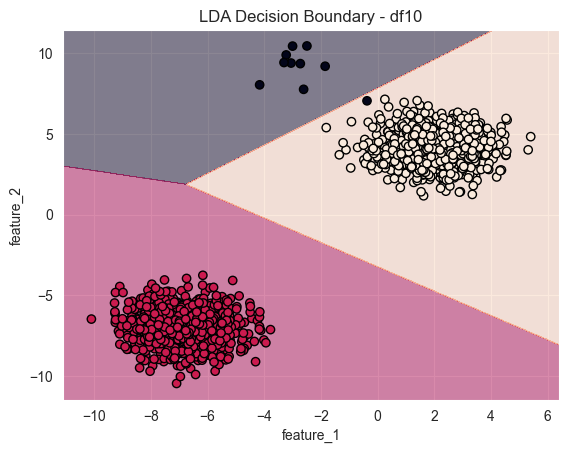

Датасет: df10, Центр класса 0: [-2.68213623  9.11518117], Центр класса 1: [-6.85365418 -6.94917586], Общий центр: [-4.76789521  1.08300265], Точка пересечения: [-0.28331171 18.35296322]


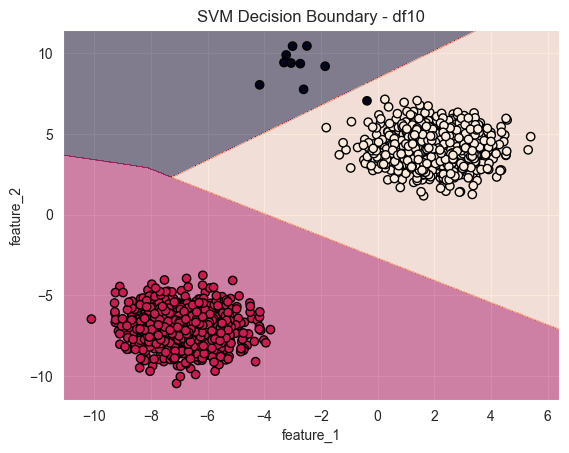

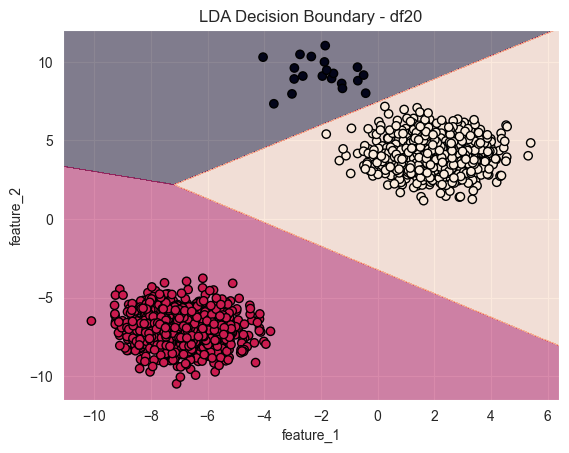

Датасет: df20, Центр класса 0: [-1.99191359  9.2126182 ], Центр класса 1: [-6.85365418 -6.94917586], Общий центр: [-4.42278389  1.13172117], Точка пересечения: [ 4.20931442 29.82724544]


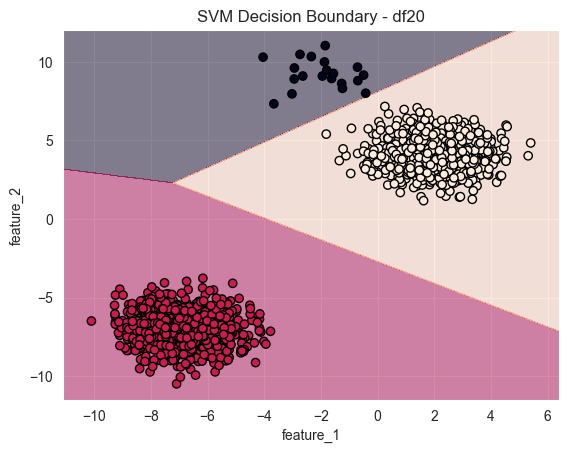

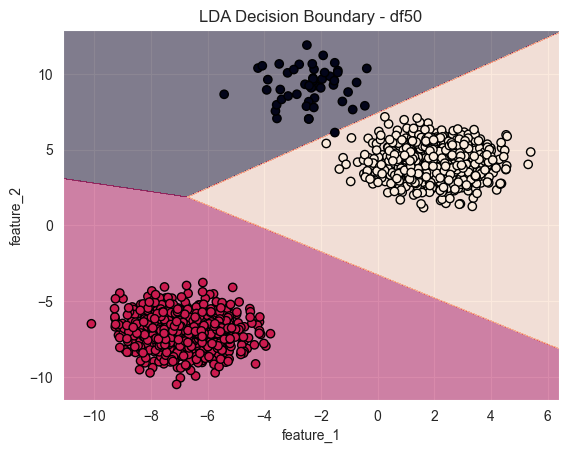

Датасет: df50, Центр класса 0: [-2.39568581  9.17558428], Центр класса 1: [-6.85365418 -6.94917586], Общий центр: [-4.62467     1.11320421], Точка пересечения: [ 1.24666993 22.35022077]


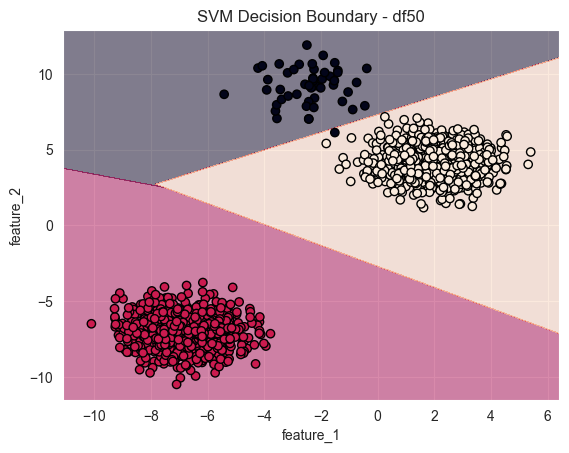

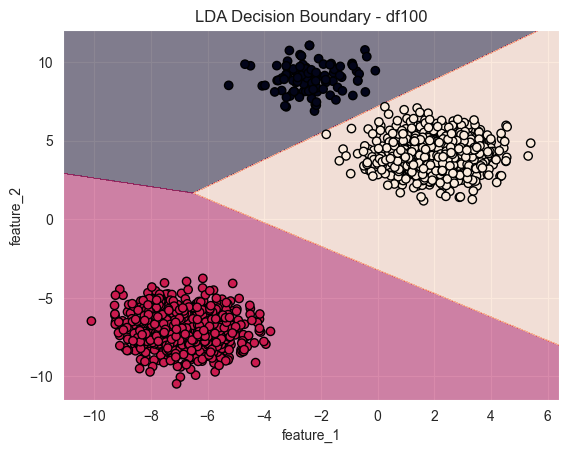

Датасет: df100, Центр класса 0: [-2.38237031  8.95944014], Центр класса 1: [-6.85365418 -6.94917586], Общий центр: [-4.61801225  1.00513214], Точка пересечения: [ 1.03119227 21.10473397]


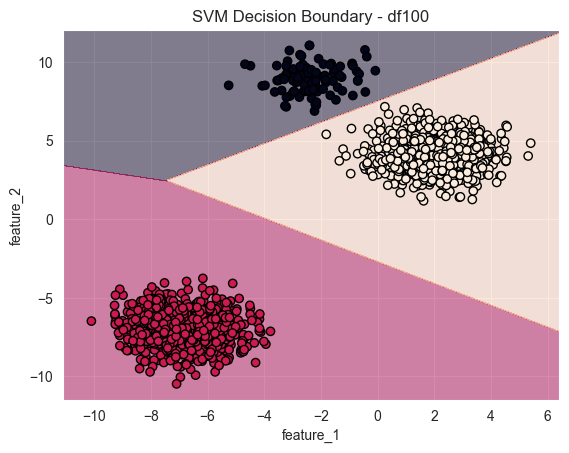

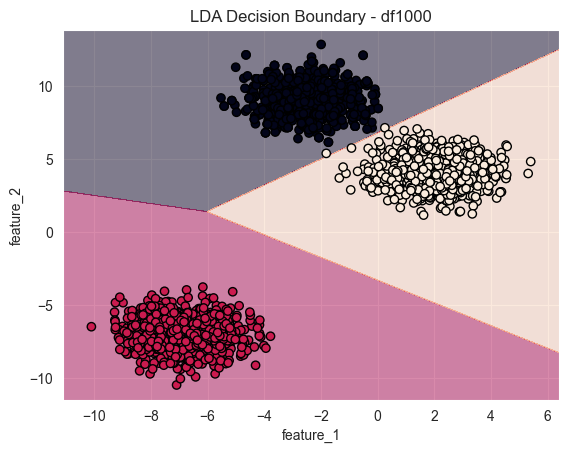

Датасет: df1000, Центр класса 0: [-2.49714775  9.01460923], Центр класса 1: [-6.85365418 -6.94917586], Общий центр: [-4.67540097  1.03271668], Точка пересечения: [ 0.52897939 20.10341263]


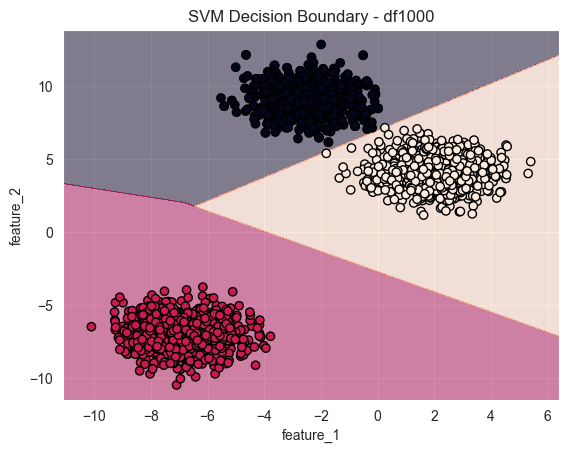

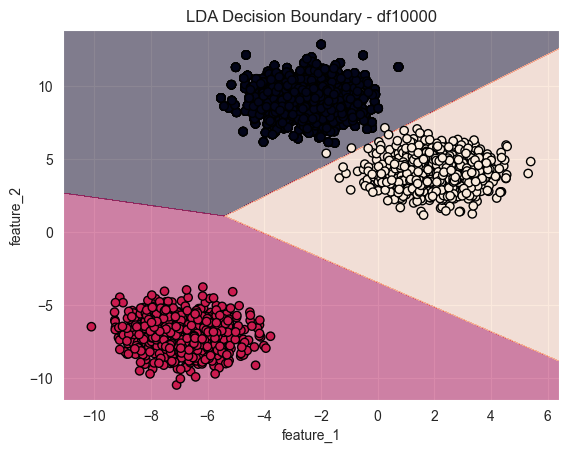

Датасет: df10000, Центр класса 0: [-2.47574327  9.0460649 ], Центр класса 1: [-6.85365418 -6.94917586], Общий центр: [-4.66469873  1.04844452], Точка пересечения: [-0.60154889 15.89366663]


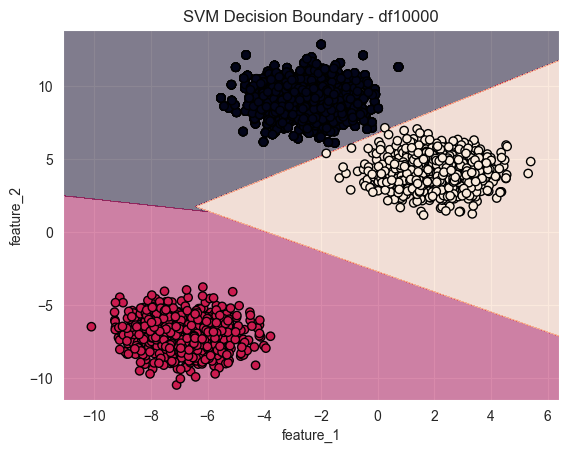

In [22]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# 
# 
# def plot_decision_boundary(lda_model, X, y, title):
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
#                          np.arange(y_min, y_max, 0.02))
# 
#     Z = lda_model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
# 
#     plt.contourf(xx, yy, Z, alpha=0.5)
#     plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
#     plt.title(title)
#     plt.xlabel('feature_1')
#     plt.ylabel('feature_2')
#     plt.show()
# 
# 
# def find_intersection_point(lda_model, center1, center2):
#     # Уравнение LDA: w.T * x + b = 0
#     w = lda_model.coef_[0]
#     b = lda_model.intercept_[0]
# 
#     # Находим точку пересечения отрезка и линии
#     # y = mx + c
#     m = (center2[1] - center1[1]) / (center2[0] - center1[0]) if center2[0] != center1[0] else np.inf
#     c = center1[1] - m * center1[0]
# 
#     # Решение системы уравнений
#     if m == np.inf:  # Вертикальная линия
#         intersection_x = center1[0]
#         intersection_y = - (w[0] * intersection_x + b) / w[1]
#     else:
#         intersection_x = (b - c) / (m - (w[1] / w[0]))
#         intersection_y = m * intersection_x + c
# 
#     return np.array([intersection_x, intersection_y])
# 
# 
# # Основная логика для всех датасетов
# datasets_to_analyze = ['df1', 'df2', 'df5', 'df10', 'df20', 'df50', 'df100', 'df1000', 'df10000']
# 
# 
# def calculate_centroids(df, class_labels):
#     centers = {label: df[df['class'] == label][['feature_1', 'feature_2']].mean().values for label in class_labels}
#     center_of_mass = np.mean([centers[label] for label in class_labels], axis=0)
#     return centers, center_of_mass
# 
# 
# # Для каждого датасета
# for name in datasets_to_analyze:
#     df = additional_datasets[name]
# 
#     # Выбор классов и признаков
#     classes_to_compare = [0, 1]  # Выбираем классы 0 и 1
#     features_to_use = ['feature_1', 'feature_2']
# 
#     X = df[features_to_use].values
#     y = df['class'].values
# 
#     # 4. LDA
#     lda = LinearDiscriminantAnalysis()
#     lda.fit(X, y)
#     plot_decision_boundary(lda, X, y, f'LDA Decision Boundary - {name}')
# 
#     # Находим центры масс и общие центры
#     centers, center_of_mass = calculate_centroids(df, classes_to_compare)
# 
#     # 6. Найдем точку пересечения
#     intersection_point = find_intersection_point(lda, centers[0], centers[1])
#     print(
#         f"Датасет: {name}, Центр класса 0: {centers[0]}, Центр класса 1: {centers[1]}, Общий центр: {center_of_mass}, Точка пересечения: {intersection_point}")
# 
#     # 5. SVM
#     svm_model = SVC(kernel='linear')
#     svm_model.fit(X, y)
# 
#     # Визуализируем SVM
#     plot_decision_boundary(svm_model, X, y, f'SVM Decision Boundary - {name}')

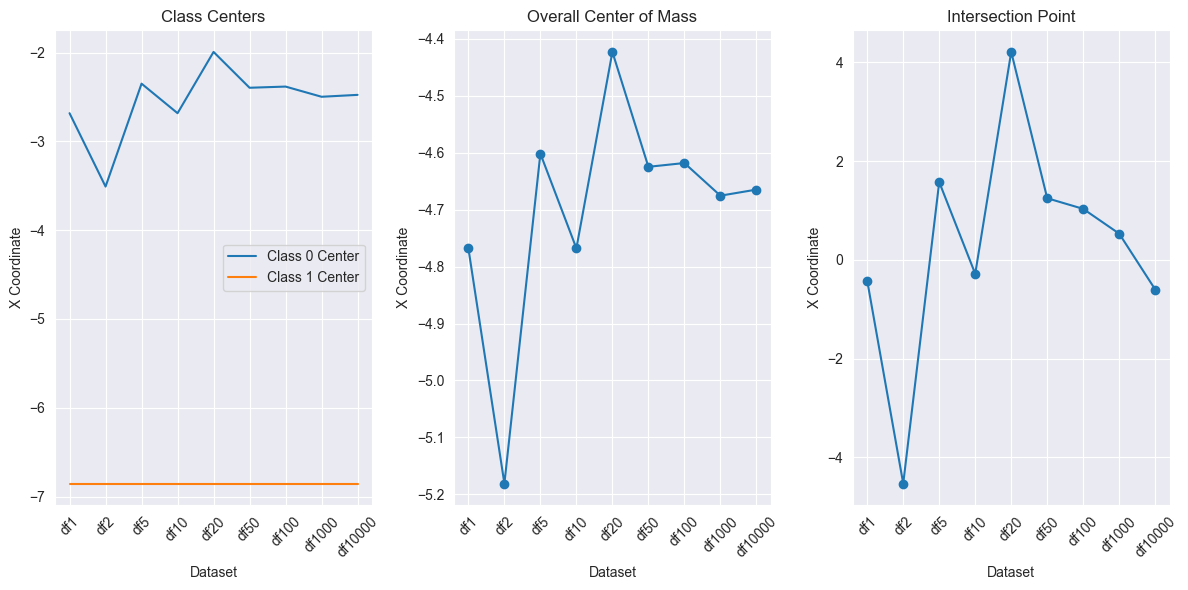

In [23]:
# # Сохранение координат для визуализации
# results = []
# 
# for name in datasets_to_analyze:
#     df = additional_datasets[name]
# 
#     # Выбор классов и признаков
#     classes_to_compare = [0, 1]
#     features_to_use = ['feature_1', 'feature_2']
# 
#     X = df[features_to_use].values
#     y = df['class'].values
# 
#     # LDA
#     lda = LinearDiscriminantAnalysis()
#     lda.fit(X, y)
# 
#     # Центры масс и общий центр масс
#     centers, center_of_mass = calculate_centroids(df, classes_to_compare)
# 
#     # Точка пересечения
#     intersection_point = find_intersection_point(lda, centers[0], centers[1])
# 
#     results.append({
#         'dataset': name,
#         'class_0_center': centers[0],
#         'class_1_center': centers[1],
#         'overall_center': center_of_mass,
#         'intersection_point': intersection_point
#     })
# 
# # Преобразование в DataFrame для визуализации
# results_df = pd.DataFrame(results)
# 
# # Визуализация зависимостей
# plt.figure(figsize=(12, 6))
# 
# # Центры классов
# plt.subplot(1, 3, 1)
# plt.plot(results_df['dataset'], results_df['class_0_center'].apply(lambda x: x[0]), label='Class 0 Center')
# plt.plot(results_df['dataset'], results_df['class_1_center'].apply(lambda x: x[0]), label='Class 1 Center')
# plt.title('Class Centers')
# plt.xlabel('Dataset')
# plt.ylabel('X Coordinate')
# plt.xticks(rotation=45)
# plt.legend()
# 
# # Общий центр масс
# plt.subplot(1, 3, 2)
# plt.plot(results_df['dataset'], results_df['overall_center'].apply(lambda x: x[0]), label='Overall Center', marker='o')
# plt.title('Overall Center of Mass')
# plt.xlabel('Dataset')
# plt.ylabel('X Coordinate')
# plt.xticks(rotation=45)
# 
# # Точка пересечения
# plt.subplot(1, 3, 3)
# plt.plot(results_df['dataset'], results_df['intersection_point'].apply(lambda x: x[0]), label='Intersection Point',
#          marker='o')
# plt.title('Intersection Point')
# plt.xlabel('Dataset')
# plt.ylabel('X Coordinate')
# plt.xticks(rotation=45)
# 
# plt.tight_layout()
# plt.show()

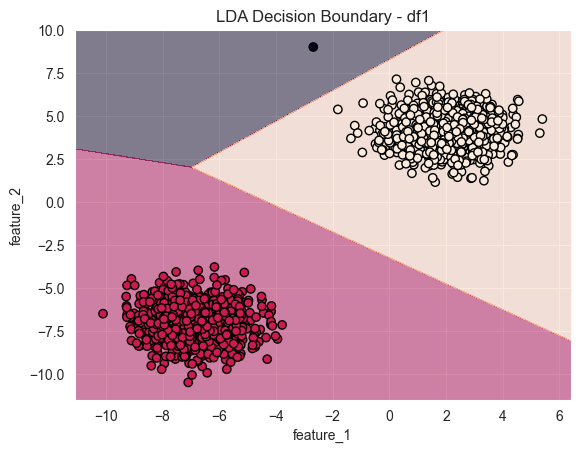

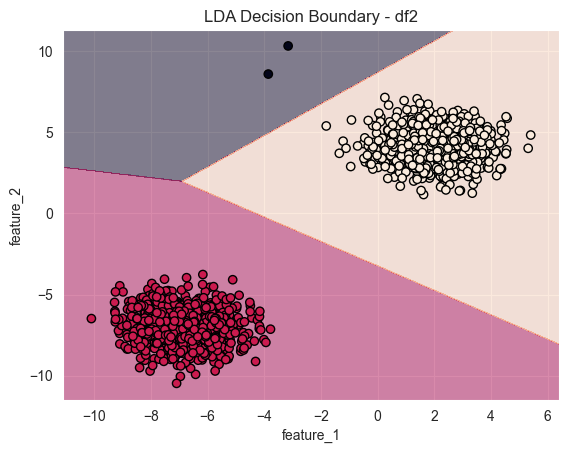

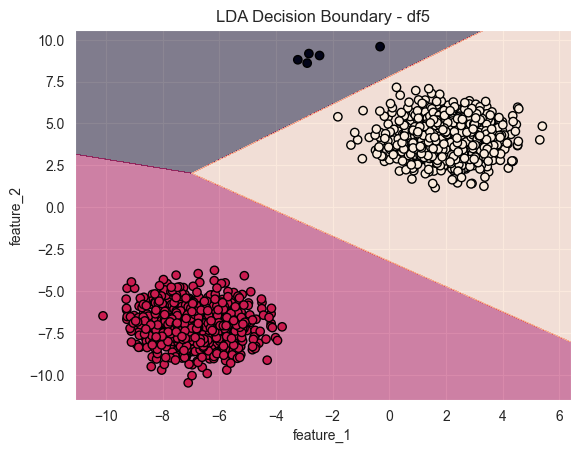

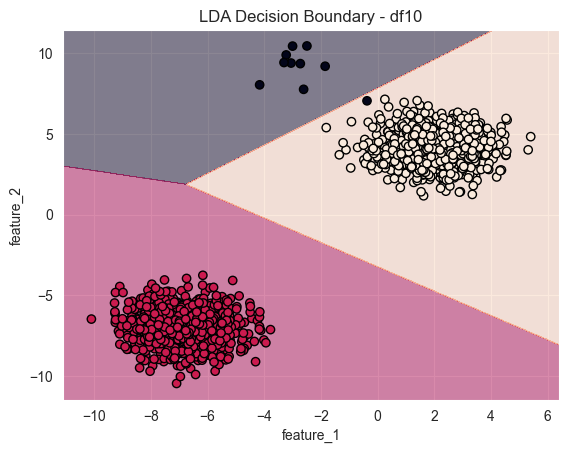

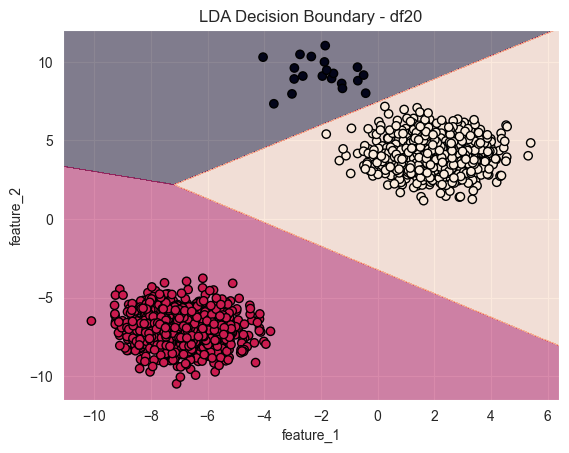

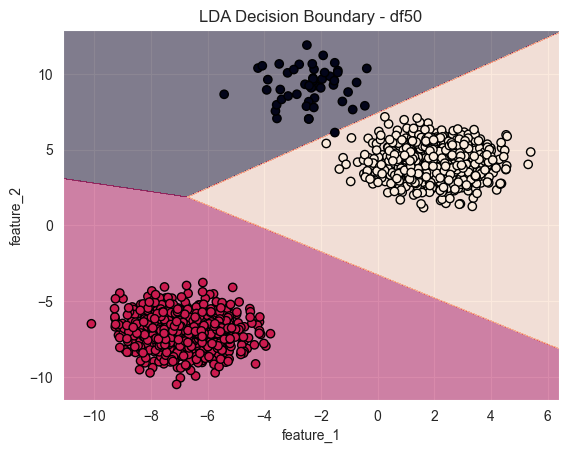

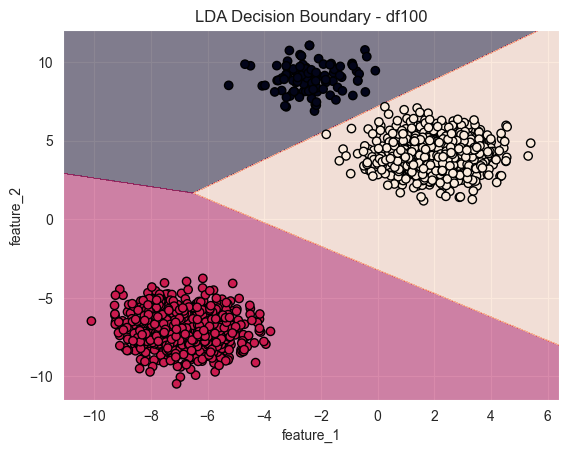

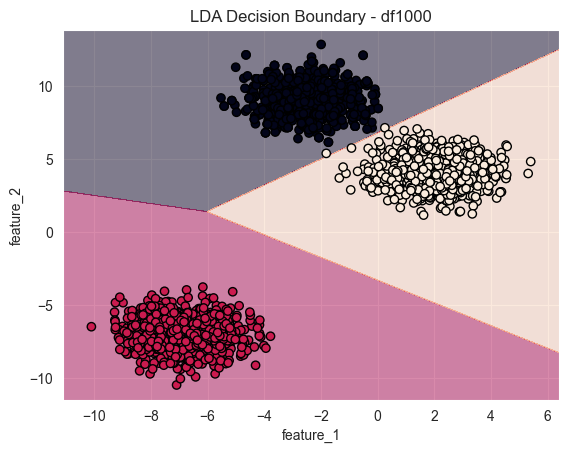

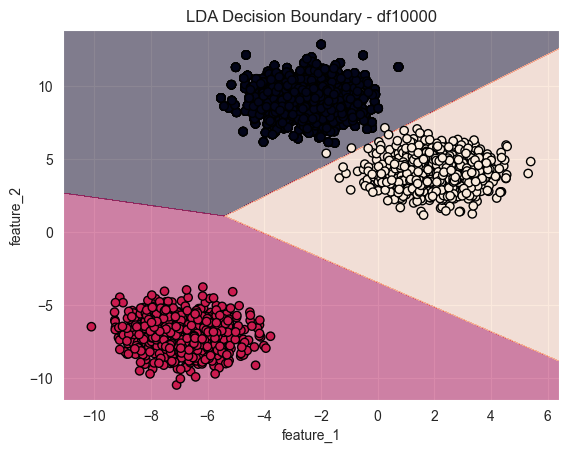

In [24]:
# [4] LDA Decision Boundary and Centroids
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('feature_1')
    plt.ylabel('feature_2')
    plt.show()

datasets_to_analyze = ['df1', 'df2', 'df5', 'df10', 'df20', 'df50', 'df100', 'df1000', 'df10000']

for name in datasets_to_analyze:
    df = additional_datasets[name]
    
    # Выбор классов и признаков
    classes_to_compare = [0, 1]  # Выбираем классы 0 и 1
    features_to_use = ['feature_1', 'feature_2']
    
    X = df[features_to_use].values
    y = df['class'].values

    # LDA
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    plot_decision_boundary(lda, X, y, f'LDA Decision Boundary - {name}')

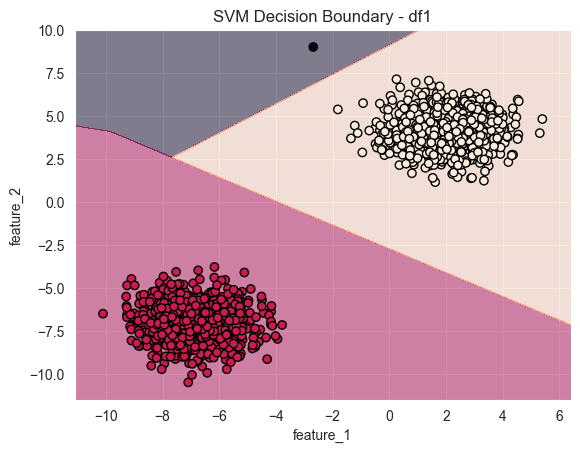

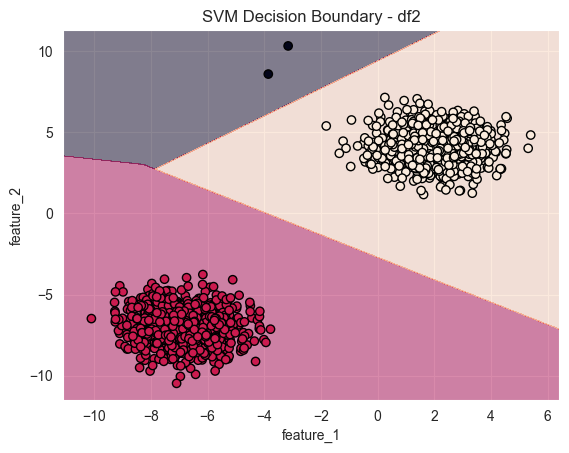

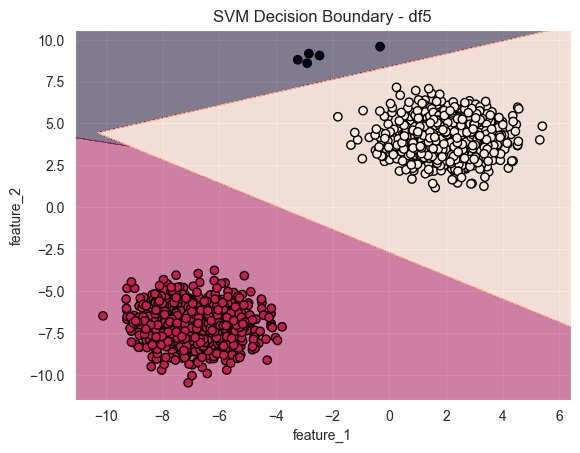

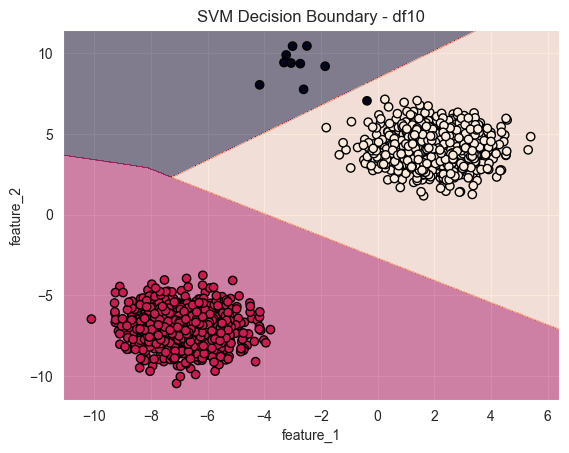

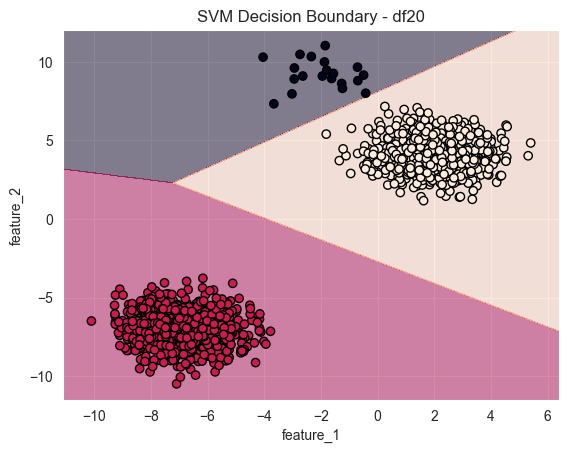

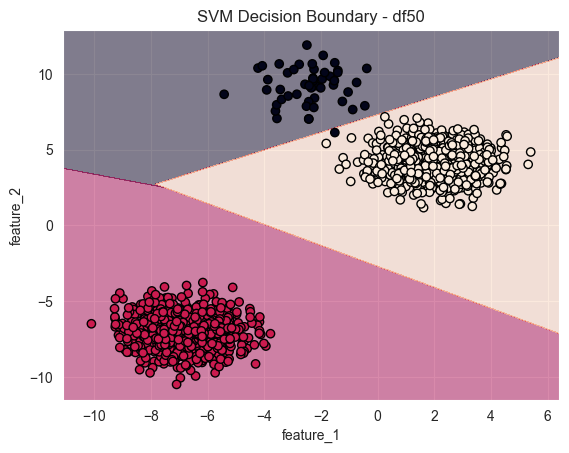

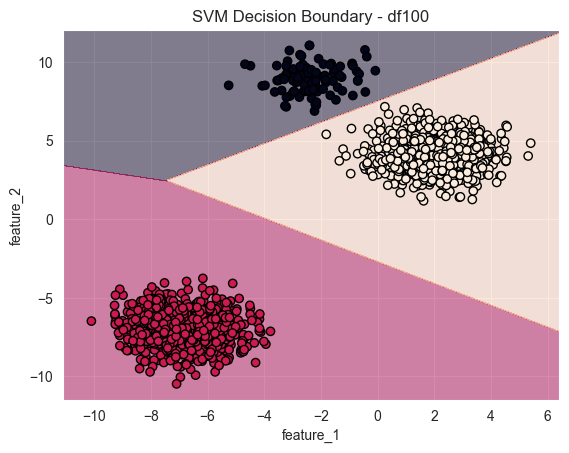

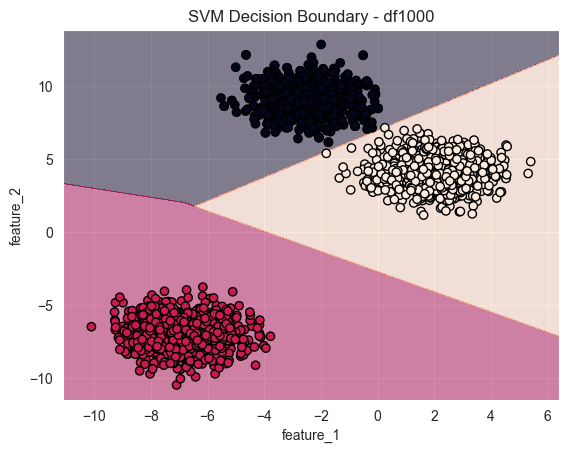

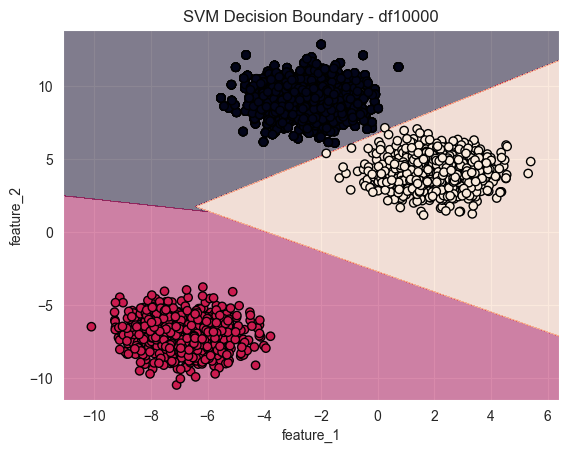

In [25]:

# [5] SVM Decision Boundary
for name in datasets_to_analyze:
    df = additional_datasets[name]
    
    classes_to_compare = [0, 1]  # Выбираем классы 0 и 1
    features_to_use = ['feature_1', 'feature_2']
    
    X = df[features_to_use].values
    y = df['class'].values

    # SVM
    svm_model = SVC(kernel='linear')
    svm_model.fit(X, y)
    
    plot_decision_boundary(svm_model, X, y, f'SVM Decision Boundary - {name}')

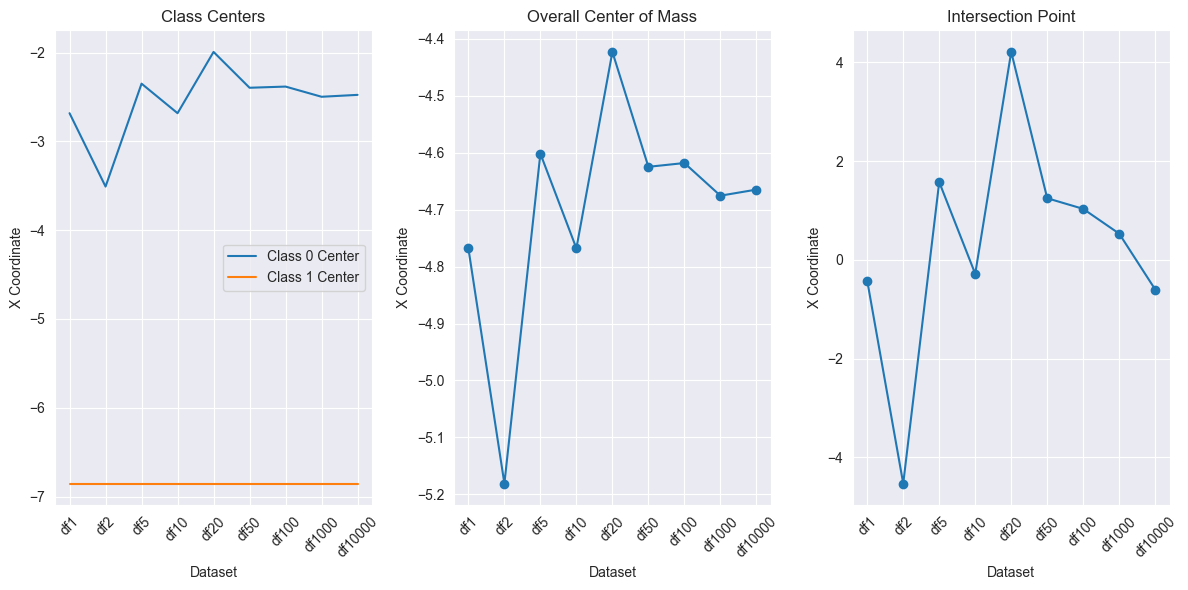

In [26]:

# [6] Centroids and Intersection Points
def calculate_centroids(df, class_labels):
    centers = {label: df[df['class'] == label][['feature_1', 'feature_2']].mean().values for label in class_labels}
    center_of_mass = np.mean([centers[label] for label in class_labels], axis=0)
    return centers, center_of_mass

def find_intersection_point(model, center1, center2):
    w = model.coef_[0]
    b = model.intercept_[0]
    
    m = (center2[1] - center1[1]) / (center2[0] - center1[0]) if center2[0] != center1[0] else np.inf
    c = center1[1] - m * center1[0]
    
    if m == np.inf:
        intersection_x = center1[0]
        intersection_y = - (w[0] * intersection_x + b) / w[1]
    else:
        intersection_x = (b - c) / (m - (w[1] / w[0]))
        intersection_y = m * intersection_x + c
    
    return np.array([intersection_x, intersection_y])

results = []

for name in datasets_to_analyze:
    df = additional_datasets[name]
    
    classes_to_compare = [0, 1]
    features_to_use = ['feature_1', 'feature_2']
    
    X = df[features_to_use].values
    y = df['class'].values

    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)

    centers, center_of_mass = calculate_centroids(df, classes_to_compare)
    intersection_point = find_intersection_point(lda, centers[0], centers[1])

    results.append({
        'dataset': name,
        'class_0_center': centers[0],
        'class_1_center': centers[1],
        'overall_center': center_of_mass,
        'intersection_point': intersection_point
    })

# Визуализация зависимостей
results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))

# Центры классов
plt.subplot(1, 3, 1)
plt.plot(results_df['dataset'], results_df['class_0_center'].apply(lambda x: x[0]), label='Class 0 Center')
plt.plot(results_df['dataset'], results_df['class_1_center'].apply(lambda x: x[0]), label='Class 1 Center')
plt.title('Class Centers')
plt.xlabel('Dataset')
plt.ylabel('X Coordinate')
plt.xticks(rotation=45)
plt.legend()

# Общий центр масс
plt.subplot(1, 3, 2)
plt.plot(results_df['dataset'], results_df['overall_center'].apply(lambda x: x[0]), label='Overall Center', marker='o')
plt.title('Overall Center of Mass')
plt.xlabel('Dataset')
plt.ylabel('X Coordinate')
plt.xticks(rotation=45)

# Точка пересечения
plt.subplot(1, 3, 3)
plt.plot(results_df['dataset'], results_df['intersection_point'].apply(lambda x: x[0]), label='Intersection Point', marker='o')
plt.title('Intersection Point')
plt.xlabel('Dataset')
plt.ylabel('X Coordinate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


задания 7

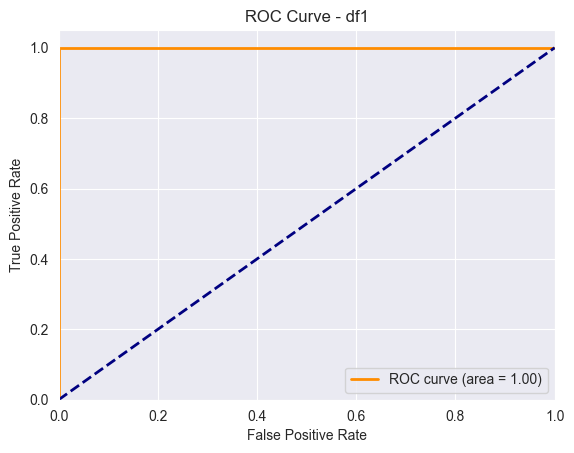

Dataset: df1, AUROC: 1.0000


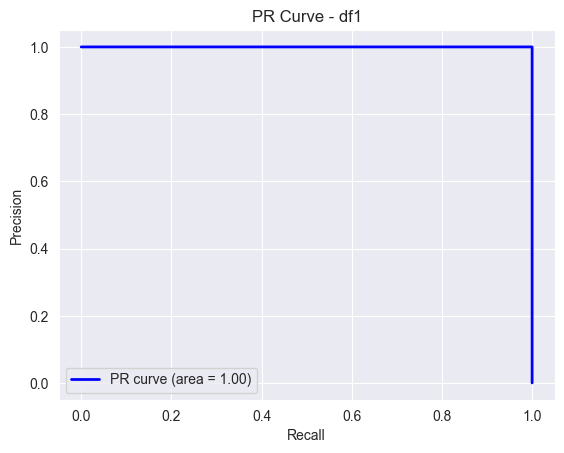

Dataset: df1, AUPRC: 1.0000


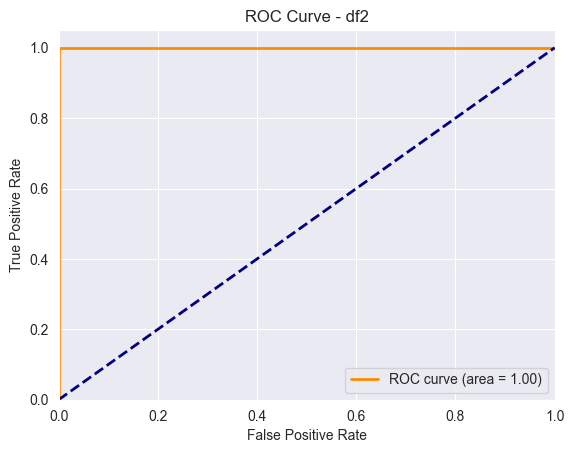

Dataset: df2, AUROC: 1.0000


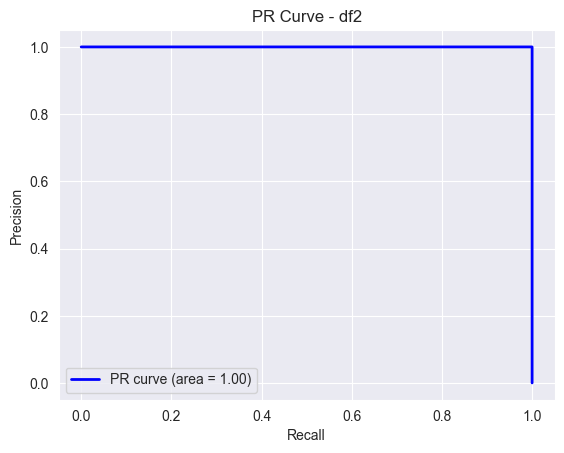

Dataset: df2, AUPRC: 1.0000


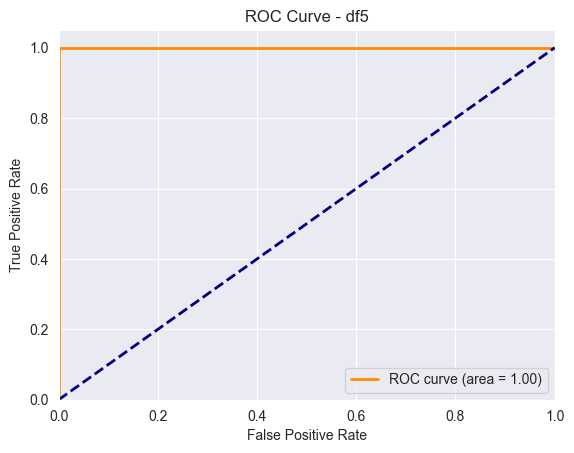

Dataset: df5, AUROC: 1.0000


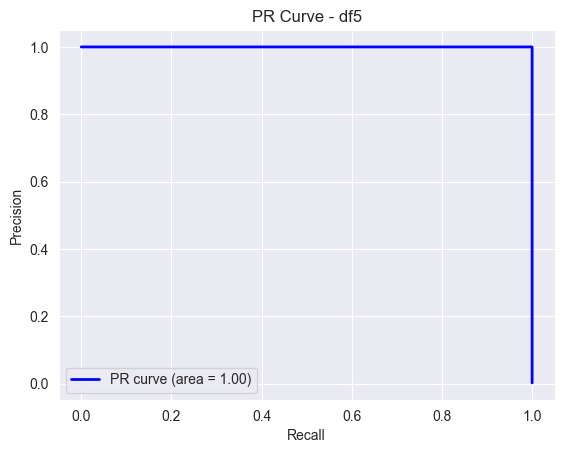

Dataset: df5, AUPRC: 1.0000


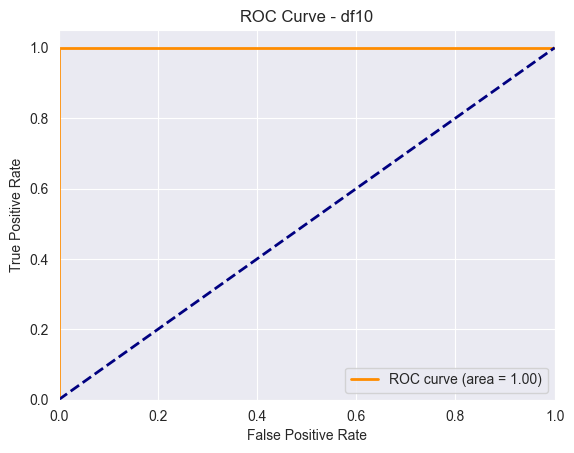

Dataset: df10, AUROC: 1.0000


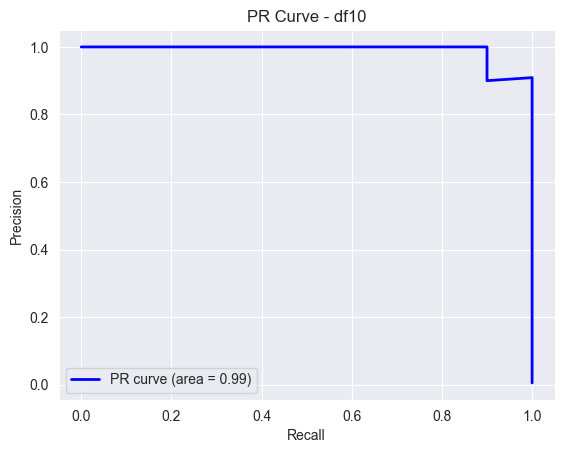

Dataset: df10, AUPRC: 0.9909


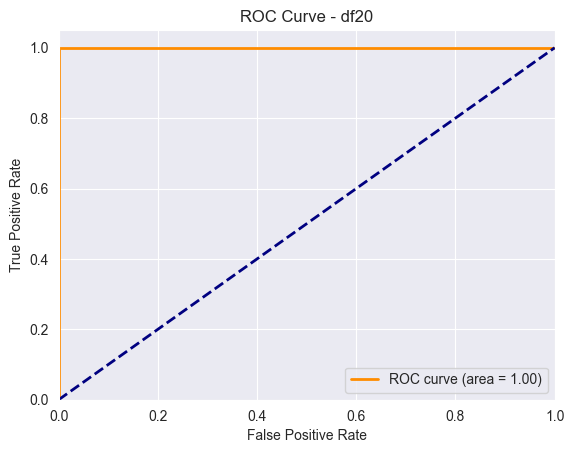

Dataset: df20, AUROC: 1.0000


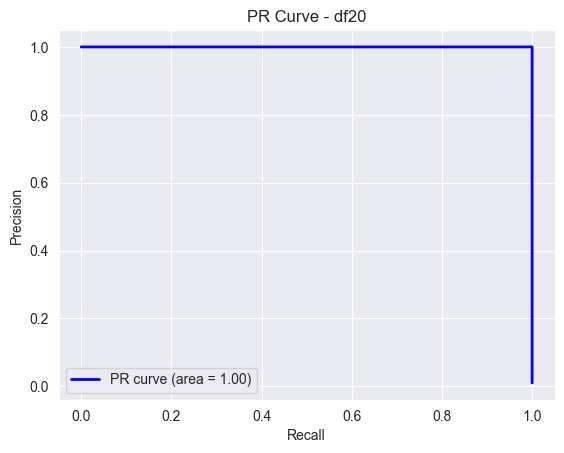

Dataset: df20, AUPRC: 1.0000


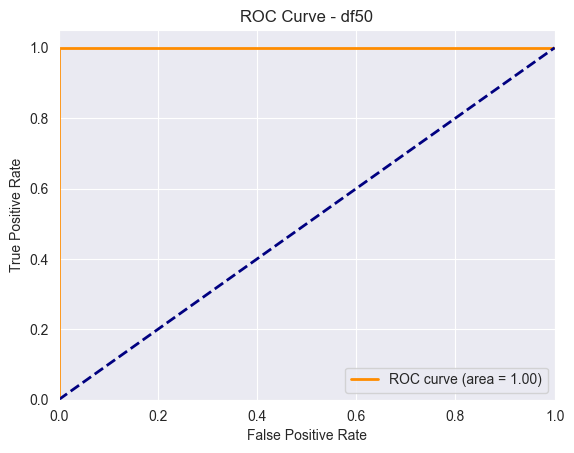

Dataset: df50, AUROC: 1.0000


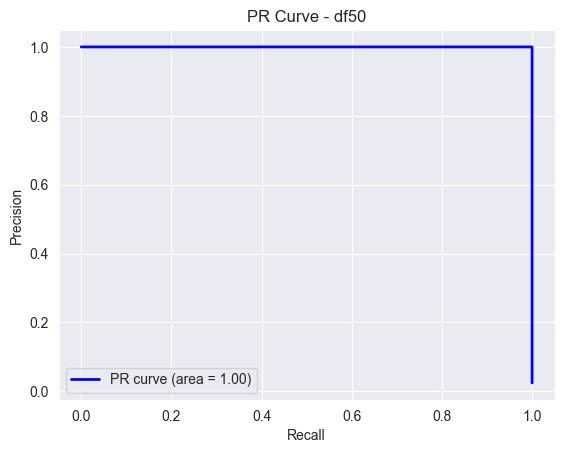

Dataset: df50, AUPRC: 1.0000


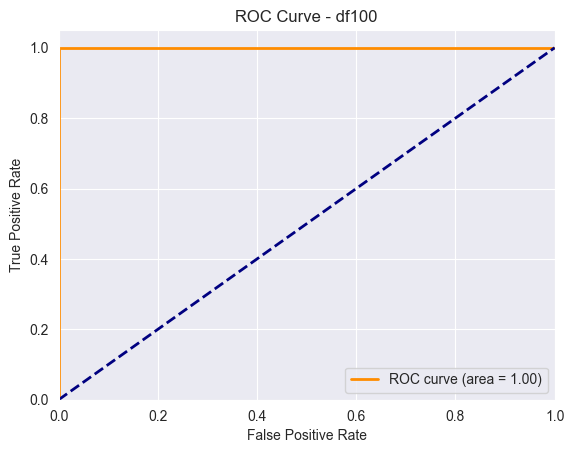

Dataset: df100, AUROC: 1.0000


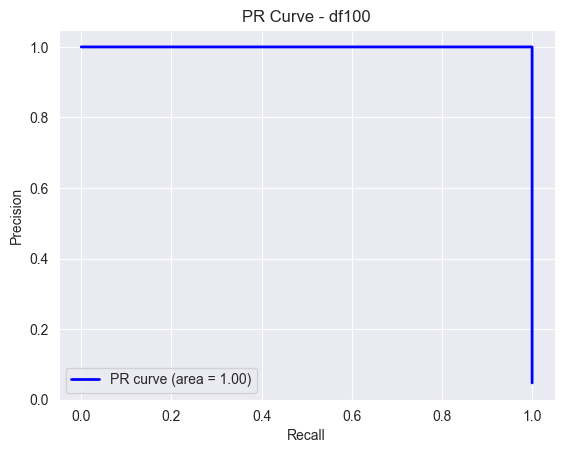

Dataset: df100, AUPRC: 1.0000


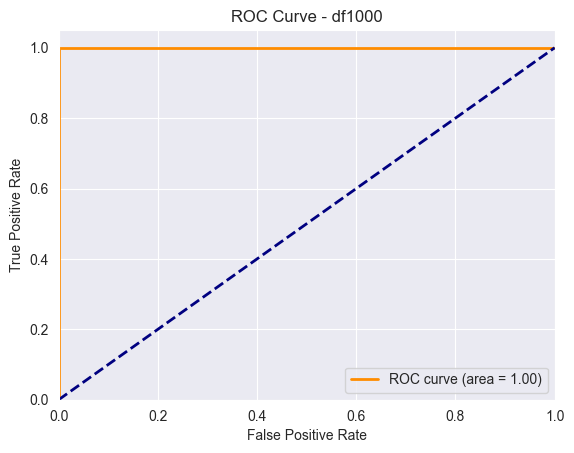

Dataset: df1000, AUROC: 1.0000


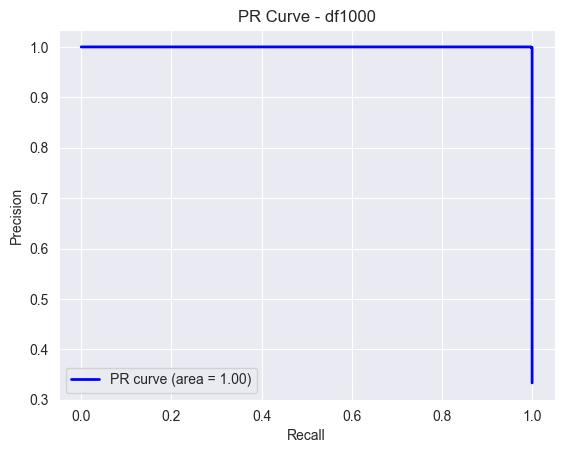

Dataset: df1000, AUPRC: 1.0000


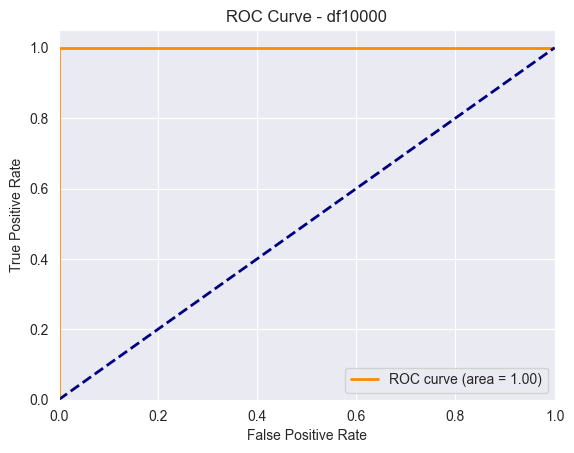

Dataset: df10000, AUROC: 1.0000


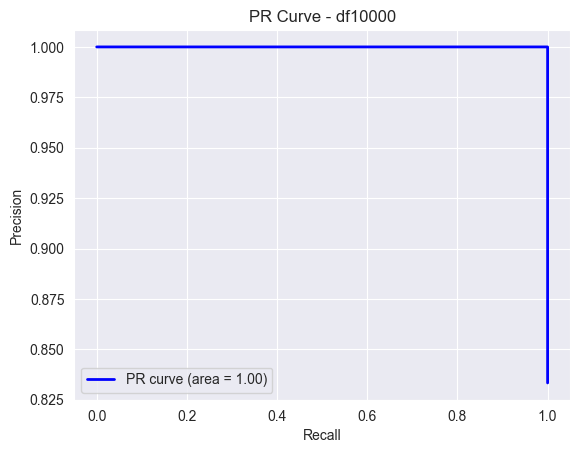

Dataset: df10000, AUPRC: 1.0000


In [27]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np
import matplotlib.pyplot as plt


def plot_roc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc


def plot_pr_curve(y_true, y_scores, title):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = average_precision_score(y_true, y_scores)

    plt.figure()
    plt.plot(recall, precision, color='b', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="lower left")
    plt.show()

    return pr_auc


def calculate_prgain(precision, recall, base_rate):
    precision_gain = (precision - base_rate) / (1 - base_rate)
    recall_gain = recall
    return precision_gain, recall_gain


def plot_prgain_curve(y_true, y_scores, title):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    base_rate = np.sum(y_true) / len(y_true)  # Доля положительных объектов

    precision_gain, recall_gain = calculate_prgain(precision, recall, base_rate)

    plt.figure()
    plt.plot(recall_gain, precision_gain, color='g', lw=2, label='PRgain curve')
    plt.xlabel('Recall gain')
    plt.ylabel('Precision gain')
    plt.title(title)
    plt.legend(loc="lower left")
    plt.show()

    # Вычисление AUPRgain через численное интегрирование
    auprgain = np.trapz(precision_gain, recall_gain)

    return auprgain


# Пример использования для каждого из датасетов
datasets_to_analyze = ['df1', 'df2', 'df5', 'df10', 'df20', 'df50', 'df100', 'df1000', 'df10000']

for name in datasets_to_analyze:
    df = additional_datasets[name]

    # Целевой класс
    target_class = 0  # Выбираем класс 0 в качестве целевого
    X = df[['feature_1', 'feature_2']].values
    y = (df['class'] == target_class).astype(int)

    # Применяем LDA (или можно использовать обученную модель)
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    y_scores = lda.decision_function(X)

    # ROC кривая и AUROC
    auroc = plot_roc_curve(y, y_scores, f'ROC Curve - {name}')
    print(f'Dataset: {name}, AUROC: {auroc:.4f}')

    # PR кривая и AUPRC
    auprc = plot_pr_curve(y, y_scores, f'PR Curve - {name}')
    print(f'Dataset: {name}, AUPRC: {auprc:.4f}')

    # PRgain кривая и AUPRgainC
    # auprgain = plot_prgain_curve(y, y_scores, f'PRgain Curve - {name}')
    # auprgain = np.trapezoid(precision_gain, recall_gain)
    # Вычисление AUPRgain через численное интегрирование
    # print(f'Dataset: {name}, AUPRgainC: {auprgain:.4f}')


задание 8

AttributeError: module 'numpy' has no attribute 'trapezoid'

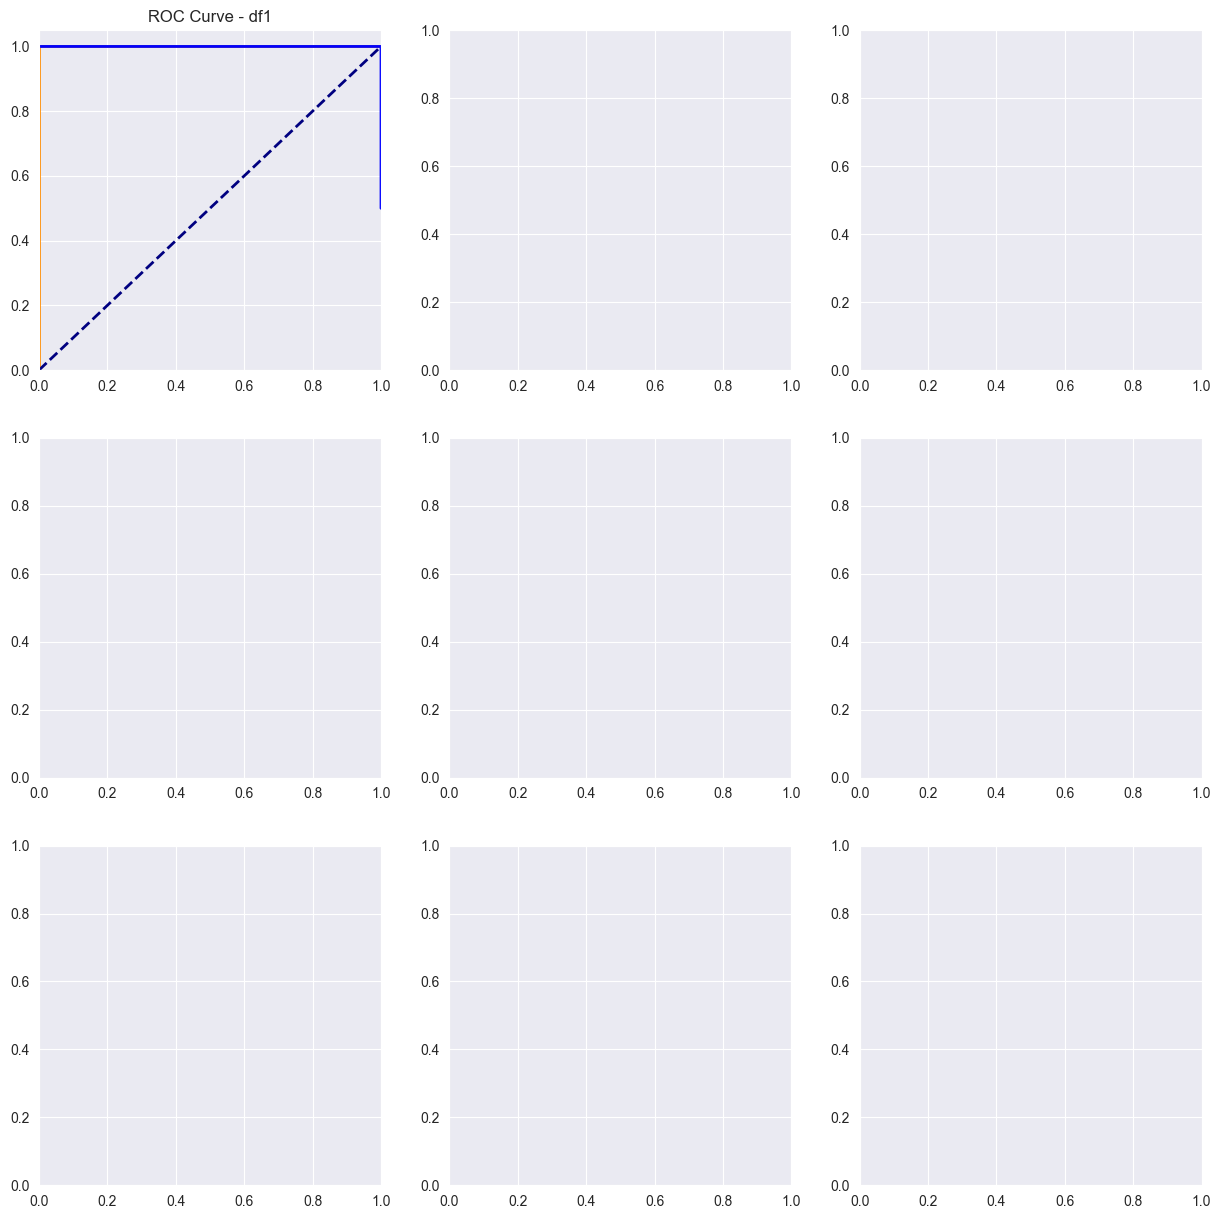

In [28]:
# Пример для другого целевого класса (например, класс 1)
target_class = 1  # Выбираем класс 1 в качестве целевого

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, name in enumerate(datasets_to_analyze):
    df = additional_datasets[name]

    X = df[['feature_1', 'feature_2']].values
    y = (df['class'] == target_class).astype(int)

    # Применяем LDA
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    y_scores = lda.decision_function(X)

    # ROC кривая и AUROC
    fpr, tpr, _ = roc_curve(y, y_scores)
    auroc = roc_auc_score(y, y_scores)
    axs[i // 3, i % 3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUROC = {auroc:.2f})')
    axs[i // 3, i % 3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i // 3, i % 3].set_title(f'ROC Curve - {name}')
    axs[i // 3, i % 3].set_xlim([0.0, 1.0])
    axs[i // 3, i % 3].set_ylim([0.0, 1.05])

    # PR кривая и AUPRC
    precision, recall, _ = precision_recall_curve(y, y_scores)
    pr_auc = average_precision_score(y, y_scores)
    axs[i // 3, i % 3].plot(recall, precision, color='b', lw=2, label=f'PR (AUPRC = {pr_auc:.2f})')

    # PRgain кривая и AUPRgainC
    base_rate = np.sum(y) / len(y)
    precision_gain, recall_gain = calculate_prgain(precision, recall, base_rate)
    auprgain = np.trapezoid(precision_gain, recall_gain)
    axs[i // 3, i % 3].plot(recall_gain, precision_gain, color='g', lw=2, label=f'PRgain (AUPRgainC = {auprgain:.2f})')

    axs[i // 3, i % 3].legend(loc="lower right")

plt.tight_layout()
plt.show()


задание 9

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score
from scipy.stats import norm


def calculate_ci(metric_scores, confidence=0.95):
    mean = np.mean(metric_scores)
    std_error = np.std(metric_scores) / np.sqrt(len(metric_scores))
    z_value = norm.ppf(1 - (1 - confidence) / 2)
    ci = z_value * std_error
    return mean, ci


folds = [3, 5, 10, 20, 50, 100]
auroc_scores = {fold: [] for fold in folds}
auprc_scores = {fold: [] for fold in folds}

df = additional_datasets['df10000']
X = df[['feature_1', 'feature_2']].values
y = (df['class'] == 0).astype(int)  # Класс 0 в качестве целевого

for fold in folds:
    skf = StratifiedKFold(n_splits=fold)
    y_pred = cross_val_predict(LinearDiscriminantAnalysis(), X, y, cv=skf, method='decision_function')

    # AUROC
    roc_auc = roc_auc_score(y, y_pred)
    auroc_scores[fold].append(roc_auc)

    # AUPRC
    precision, recall, _ = precision_recall_curve(y, y_pred)
    pr_auc = average_precision_score(y, y_pred)
    auprc_scores[fold].append(pr_auc)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for fold in folds:
    # Вычисляем доверительные интервалы
    auroc_mean, auroc_ci = calculate_ci(auroc_scores[fold], confidence=0.95)
    auprc_mean, auprc_ci = calculate_ci(auprc_scores[fold], confidence=0.95)

    # AUROC с доверительными интервалами
    axs[0].errorbar(fold, auroc_mean, yerr=auroc_ci, fmt='o', capsize=5, label=f'{fold}-fold')
    axs[0].set_title('AUROC with 95% CI')
    axs[0].set_xlabel('Number of Folds')
    axs[0].set_ylabel('AUROC')

    # AUPRC с доверительными интервалами
    axs[1].errorbar(fold, auprc_mean, yerr=auprc_ci, fmt='o', capsize=5, label=f'{fold}-fold')
    axs[1].set_title('AUPRC with 95% CI')
    axs[1].set_xlabel('Number of Folds')
    axs[1].set_ylabel('AUPRC')

plt.tight_layout()
plt.show()
